In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [7]:
steps = [('dtf', Data_Transformer()),
        ('rescale', MinMaxScaler()),
        ('lr', LogisticRegression(class_weight='balanced', n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'lr__penalty': ['l1', 'l2'], 
              'lr__C': np.logspace(-2, 4, 20)}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [8]:
model_gsv.fit(X_train, y_train)

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x00000185FFE1B190>),
                                       ('rescale', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           n_jobs=-1))]),
             param_grid={'lr__C': array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
       1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
       3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
       6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
       1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+04]),
                         'lr__penalty': ['l1', 'l2']},
             scoring=make_scorer(recall_score, average=macro))

In [9]:
model_gsv.best_params_

{'lr__C': 0.04281332398719394, 'lr__penalty': 'l2'}

In [10]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_lr__penalty', 'param_lr__C',  'mean_test_score', 'rank_test_score']]
result

,param_lr__penalty,param_lr__C,mean_test_score,rank_test_score
0,l1,0.01,NaN,21
1,l2,0.01,0.737384,20
2,l1,0.020691,NaN,21
3,l2,0.020691,0.743098,19
4,l1,0.042813,NaN,21
5,l2,0.042813,0.746862,1
6,l1,0.088587,NaN,21
7,l2,0.088587,0.746527,3
8,l1,0.183298,NaN,21
9,l2,0.183298,0.745768,6


In [11]:
y_test_pred = model_gsv.predict(X_test)

In [12]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       822
           1       0.81      0.66      0.73      1217
           2       0.56      0.90      0.69       461

    accuracy                           0.71      2500
   macro avg       0.70      0.75      0.71      2500
weighted avg       0.74      0.71      0.71      2500



In [13]:
confusion_matrix(y_test,y_test_pred)

array([[562, 146, 114],
       [208, 800, 209],
       [  7,  41, 413]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

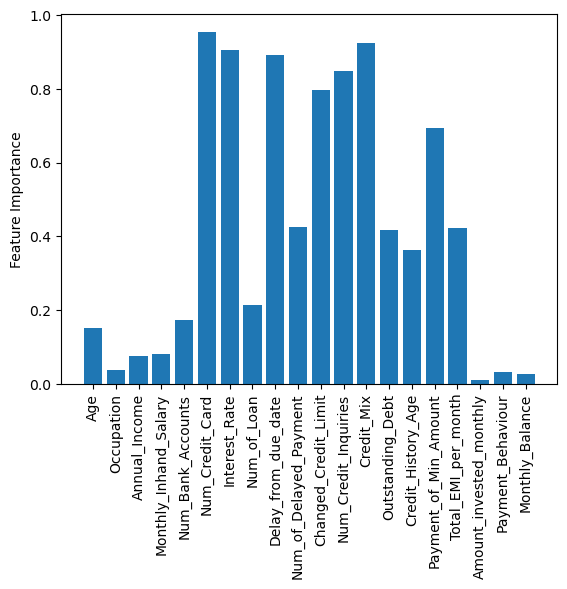

In [14]:
plt.bar(model_gsv.best_estimator_.steps[0][1].transform(X_train).columns, np.mean(np.abs(model_gsv.best_estimator_.steps[2][1].coef_), axis=0))
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

In [15]:
from yellowbrick.classifier import ROCAUC

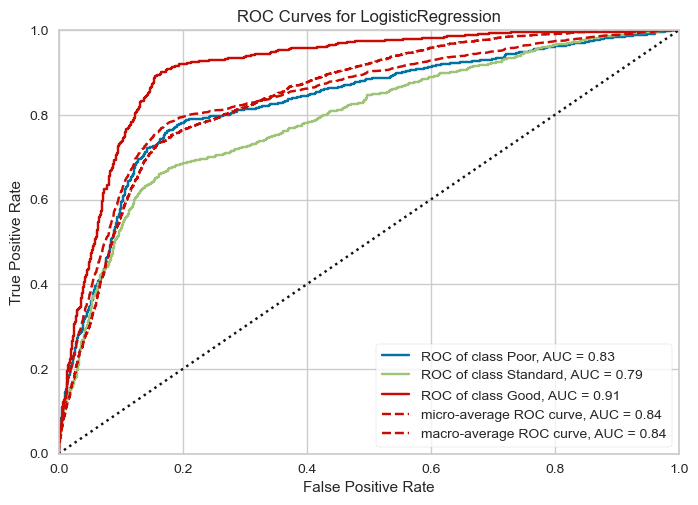

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [18]:
steps = [('dtf', Data_Transformer()),
        ('rescale', MinMaxScaler()),
        ('knn', KNeighborsClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'knn__n_neighbors': [2, 5, 10, 15, 20], 
              'knn__metric': ['euclidean', 'manhattan'],
              'knn__weights': ['uniform', 'distance']}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [19]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001858257C2D0>),
                                       ('rescale', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_jobs=-1))]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [2, 5, 10, 15, 20],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, average=macro))

In [20]:
model_gsv.best_params_

{'knn__metric': 'euclidean',
 'knn__n_neighbors': 20,
 'knn__weights': 'distance'}

In [21]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_knn__n_neighbors', 'param_knn__metric', 'param_knn__weights', 'mean_test_score', 'rank_test_score']]
result

,param_knn__n_neighbors,param_knn__metric,param_knn__weights,mean_test_score,rank_test_score
0,2,euclidean,uniform,0.579485,19
1,2,euclidean,distance,0.620079,17
2,5,euclidean,uniform,0.667809,15
3,5,euclidean,distance,0.686460,13
4,10,euclidean,uniform,0.705214,10
5,10,euclidean,distance,0.711354,8
6,15,euclidean,uniform,0.718758,5
7,15,euclidean,distance,0.723533,4
8,20,euclidean,uniform,0.724851,2
9,20,euclidean,distance,0.728198,1


In [22]:
y_test_pred = model_gsv.predict(X_test)

In [23]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       822
           1       0.78      0.76      0.77      1217
           2       0.60      0.80      0.69       461

    accuracy                           0.74      2500
   macro avg       0.72      0.74      0.73      2500
weighted avg       0.75      0.74      0.74      2500



In [24]:
confusion_matrix(y_test,y_test_pred)

array([[557, 184,  81],
       [135, 921, 161],
       [ 14,  80, 367]], dtype=int64)

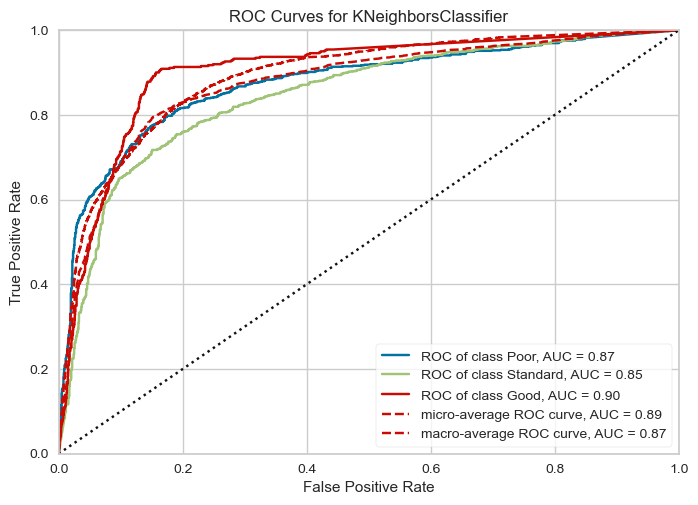

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [27]:
steps = [('dtf', Data_Transformer()),
        ('bgc', BaggingClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'bgc__n_estimators': [10, 50, 100, 200], 
              'bgc__max_samples': [0.5, 0.75, 1.0],
              'bgc__max_features': [0.5, 0.75, 1.0]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [28]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x0000018582644ED0>),
                                       ('bgc', BaggingClassifier(n_jobs=-1))]),
             param_grid={'bgc__max_features': [0.5, 0.75, 1.0],
                         'bgc__max_samples': [0.5, 0.75, 1.0],
                         'bgc__n_estimators': [10, 50, 100, 200]},
             scoring=make_scorer(recall_score, average=macro))

In [29]:
model_gsv.best_params_

{'bgc__max_features': 0.75, 'bgc__max_samples': 0.5, 'bgc__n_estimators': 200}

In [30]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_bgc__n_estimators', 'param_bgc__max_samples', 'param_bgc__max_features', 'mean_test_score', 'rank_test_score']]
result

,param_bgc__n_estimators,param_bgc__max_samples,param_bgc__max_features,mean_test_score,rank_test_score
0,10,0.5,0.5,0.679283,34
1,50,0.5,0.5,0.719947,27
2,100,0.5,0.5,0.730603,23
3,200,0.5,0.5,0.736869,20
4,10,0.75,0.5,0.675638,35
5,50,0.75,0.5,0.724870,25
6,100,0.75,0.5,0.737504,19
7,200,0.75,0.5,0.750171,7
8,10,1.0,0.5,0.667848,36
9,50,1.0,0.5,0.720747,26


In [31]:
y_test_pred = model_gsv.predict(X_test)

In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       822
           1       0.82      0.75      0.78      1217
           2       0.65      0.83      0.73       461

    accuracy                           0.77      2500
   macro avg       0.75      0.78      0.76      2500
weighted avg       0.78      0.77      0.77      2500



In [33]:
confusion_matrix(y_test,y_test_pred)

array([[625, 132,  65],
       [158, 915, 144],
       [  8,  69, 384]], dtype=int64)

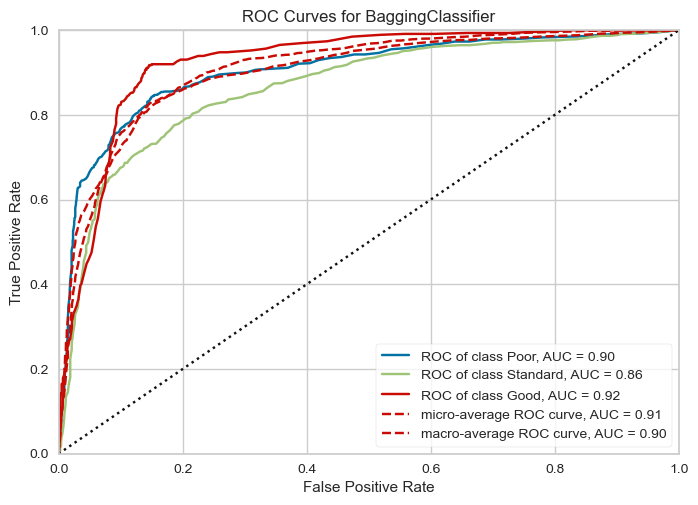

<Axes: title={'center': 'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [36]:
steps = [('dtf', Data_Transformer()),
        ('etc', ExtraTreesClassifier(class_weight='balanced', n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'etc__n_estimators': [50, 100, 200], 
              'etc__max_depth': [4, 5, 6, 7, 8],
              'etc__max_features': ['sqrt', 'log2']}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [37]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x000001858505A910>),
                                       ('etc',
                                        ExtraTreesClassifier(class_weight='balanced',
                                                             n_jobs=-1))]),
             param_grid={'etc__max_depth': [4, 5, 6, 7, 8],
                         'etc__max_features': ['sqrt', 'log2'],
                         'etc__n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score, average=macro))

In [38]:
model_gsv.best_params_

{'etc__max_depth': 8, 'etc__max_features': 'sqrt', 'etc__n_estimators': 100}

In [39]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_etc__n_estimators', 'param_etc__max_depth', 'param_etc__max_features', 'mean_test_score', 'rank_test_score']]
result

,param_etc__n_estimators,param_etc__max_depth,param_etc__max_features,mean_test_score,rank_test_score
0,50,4,sqrt,0.767790,18
1,100,4,sqrt,0.765832,29
2,200,4,sqrt,0.766268,28
3,50,4,log2,0.764977,30
4,100,4,log2,0.767427,23
5,200,4,log2,0.766431,27
6,50,5,sqrt,0.767092,24
7,100,5,sqrt,0.766843,25
8,200,5,sqrt,0.767546,22
9,50,5,log2,0.767727,19


In [40]:
y_test_pred = model_gsv.predict(X_test)

In [41]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       822
           1       0.87      0.65      0.75      1217
           2       0.56      0.90      0.69       461

    accuracy                           0.73      2500
   macro avg       0.72      0.77      0.73      2500
weighted avg       0.77      0.73      0.74      2500



In [42]:
confusion_matrix(y_test,y_test_pred)

array([[627,  77, 118],
       [218, 792, 207],
       [  5,  40, 416]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

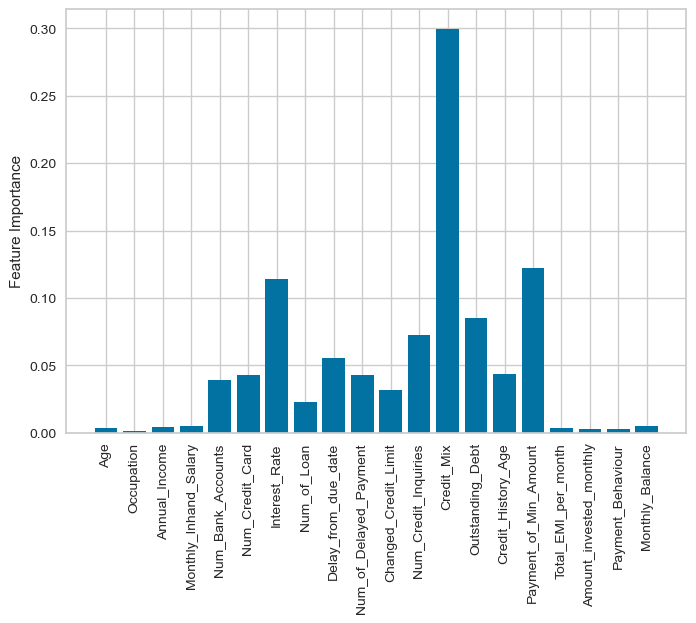

In [43]:
plt.bar(model_gsv.best_estimator_.steps[0][1].transform(X_train).columns, model_gsv.best_estimator_.steps[1][1].feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

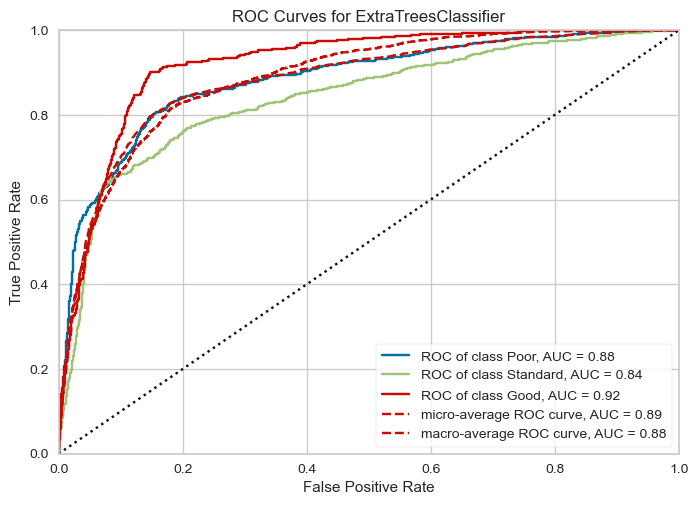

<Axes: title={'center': 'ROC Curves for ExtraTreesClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [45]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

In [46]:
steps = [('dtf', Data_Transformer()),
        ('xgbc', XGBClassifier(n_jobs=-1))]
model = Pipeline(steps)
param_grid = {'xgbc__gamma': [0.0, 0.1, 0.2, 0.3], 
              'xgbc__learning_rate': [0.05, 0.1], 
              'xgbc__n_estimators': [100, 300, 500], 
              'xgbc__max_depth': [3, 5, 10]}
model_gsv = GridSearchCV(model, param_grid, cv=2, scoring=make_scorer(recall_score, average='macro', greater_is_better=True))

In [47]:
model_gsv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('dtf',
                                        <__main__.Data_Transformer object at 0x0000018587254B10>),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=-1,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbc__gamma': [0.0, 0.1, 0.2, 0.3],
                         'xgbc__learning_rate': [0.05, 0.1],
                         'xgbc__max_depth': [3, 5, 10],
                         'xgbc__n_estimators': [100, 300, 500]},
             scoring=make_scorer(recall_score, average=macro))

In [48]:
model_gsv.best_params_

{'xgbc__gamma': 0.0,
 'xgbc__learning_rate': 0.05,
 'xgbc__max_depth': 3,
 'xgbc__n_estimators': 100}

In [49]:
result = model_gsv.cv_results_
result = pd.DataFrame(result)[['param_xgbc__gamma', 'param_xgbc__learning_rate', 'param_xgbc__n_estimators', 'param_xgbc__max_depth', 'mean_test_score', 'rank_test_score']]
result

,param_xgbc__gamma,param_xgbc__learning_rate,param_xgbc__n_estimators,param_xgbc__max_depth,mean_test_score,rank_test_score
0,0.0,0.05,100,3,0.766342,1
1,0.0,0.05,300,3,0.756567,15
2,0.0,0.05,500,3,0.747693,21
3,0.0,0.05,100,5,0.758589,11
4,0.0,0.05,300,5,0.740304,35
...,...,...,...,...,...,...
67,0.3,0.1,300,5,0.731528,63
68,0.3,0.1,500,5,0.727083,69
69,0.3,0.1,100,10,0.736622,39
70,0.3,0.1,300,10,0.734148,52


In [50]:
y_test_pred = model_gsv.predict(X_test)

In [51]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       822
           1       0.81      0.75      0.78      1217
           2       0.61      0.86      0.72       461

    accuracy                           0.76      2500
   macro avg       0.75      0.78      0.75      2500
weighted avg       0.78      0.76      0.76      2500



In [52]:
confusion_matrix(y_test,y_test_pred)

array([[593, 157,  72],
       [128, 909, 180],
       [  8,  55, 398]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

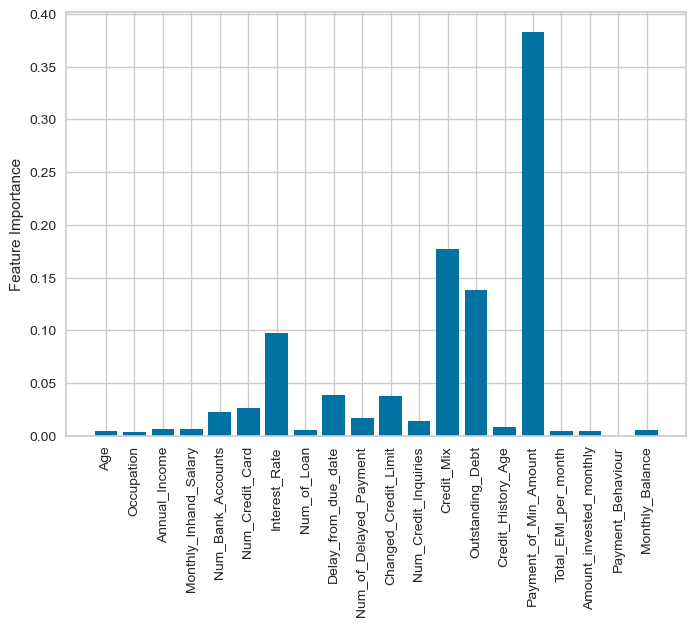

In [53]:
plt.bar(model_gsv.best_estimator_.steps[0][1].transform(X_train).columns, model_gsv.best_estimator_.steps[1][1].feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

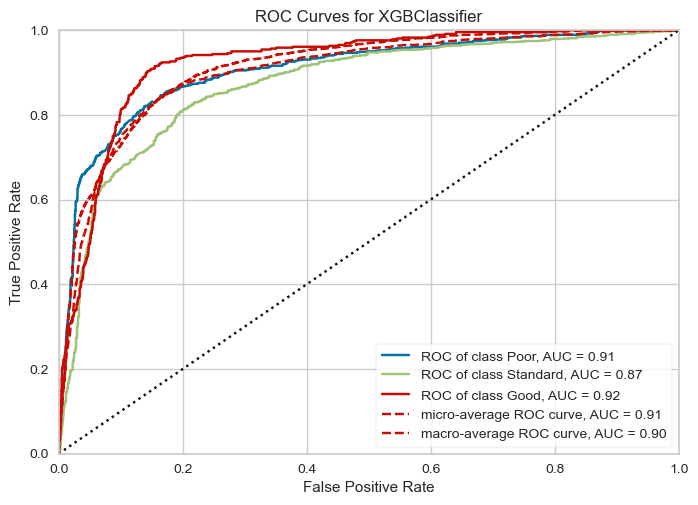

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
model = model_gsv.best_estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
steps = [('dtf', Data_Transformer()),
        ('rescale', MinMaxScaler()),
        ('svc', SVC(class_weight='balanced'))]
model = Pipeline(steps)

In [57]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000018583170A10>),
                ('rescale', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced'))])

In [58]:
y_test_pred = model.predict(X_test)

In [59]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       822
           1       0.87      0.64      0.74      1217
           2       0.56      0.90      0.69       461

    accuracy                           0.73      2500
   macro avg       0.72      0.77      0.72      2500
weighted avg       0.77      0.73      0.73      2500



In [60]:
confusion_matrix(y_test,y_test_pred)

array([[626,  79, 117],
       [230, 780, 207],
       [  5,  40, 416]], dtype=int64)

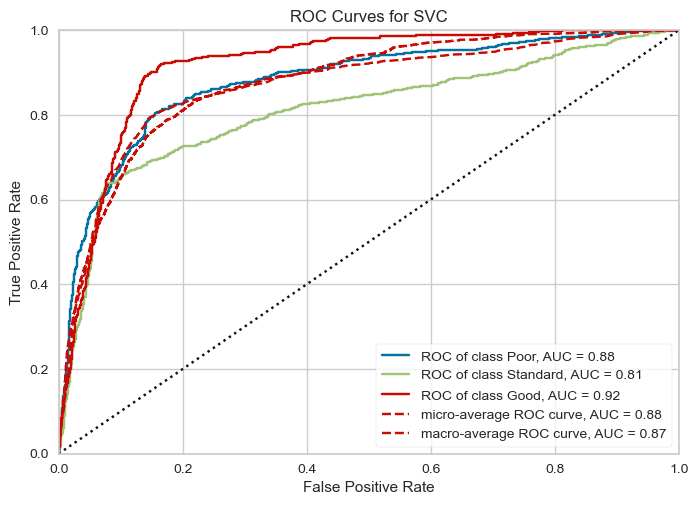

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [61]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()